<h1> cnn_study.ipynb

### CNNs (convolutional neural networks)
#### neural network (신경망) 의 한 종류
#### 컴퓨터 비전에 사용 (특히, 시각적 데이터에서 패턴 찾기)

다양한 문제에 다양한 종류의 모델 구조를 사용할 수 있다.
이미지 데이터 및 텍스트 데이터에서 예측을 하기 위해 CNN을 사용할 수도 있지만,
이 CNN이 문제에 최선은 아니다.

### CNN 사용 사례 

1. 음식 사진에 피자 또는 스테이크가 포함되어 있는지 분류
2. 이미지에 물체가 나타났는지 여부를 감지

### TensorFlow로 작성하는 과정
1. 작업할 데이터셋 준비하기
2. CNN의 구조를 설계 
3. 설계한 CNN으로 이미지 분류
  * 모델을 위해 데이터 전처리
  * 모델을 준비하고
  * 모델 fir
  * 모델 평가


음식 분류 
https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/ 


In [2]:
## 다운로드 받는 것 
## 윈도우에서는 안됌
## wget.exe 사용 하면 사용 가능 
## unzip.exe도 많이 쓴다.
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

.......... .......... .......... ..........  2% 2.68M 37s
  2450K .......... .......... .......... .......... ..........  2% 2.10M 37s
  2500K .......... .......... .......... .......... ..........  2% 2.21M 37s
  2550K .......... .......... .......... .......... ..........  2% 4.74M 37s
  2600K .......... .......... .......... .......... ..........  2% 2.02M 37s
  2650K .......... .......... .......... .......... ..........  2% 1.92M 38s
  2700K .......... .......... .......... .......... ..........  2% 3.61M 37s
  2750K .......... .......... .......... .......... ..........  2% 2.25M 37s
  2800K .......... .......... .......... .......... ..........  2% 1.56M 38s
  2850K .......... .......... .......... .......... ..........  2% 2.44M 38s
  2900K .......... .......... .......... .......... ..........  2%  582K 40s
  2950K .......... .......... .......... .......... ..........  2% 1.51M 41s
  3000K .......... .......... .......... .......... ..........  2% 5.86M 40s
  3050K ..........

우리가 하려고 하는 것은!
간단히 개념을 익히기 위해서 피자 또는 스테이크만 찾는 이진 분류기를 만들어보고자 한다.

In [3]:
## zip 파일 풀기 
import zipfile 

zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [4]:
# !dir pizza_steak (윈도우)
# !ls pizza_steak (맥이나 리눅스)
## 훈련이나 테스트 폴더가 있는 것을 확인하는것 
!dir pizza_steak

 C ����̺��� �������� �̸��� �����ϴ�.
 ���� �Ϸ� ��ȣ: 2E2C-E4C8

 c:\Users\user\Desktop\Git\StudyCV\20210612_1\pizza_steak ���͸�

2021-06-12  ���� 02:00    <DIR>          .
2021-06-12  ���� 02:00    <DIR>          ..
2021-06-12  ���� 02:00             6,148 .DS_Store
2021-06-12  ���� 02:00    <DIR>          test
2021-06-12  ���� 02:00    <DIR>          train
               1�� ����               6,148 ����Ʈ
               4�� ���͸�  864,296,607,744 ����Ʈ ����


In [5]:
!dir pizza_steak\train

 C ����̺��� �������� �̸��� �����ϴ�.
 ���� �Ϸ� ��ȣ: 2E2C-E4C8

 c:\Users\user\Desktop\Git\StudyCV\20210612_1\pizza_steak\train ���͸�

2021-06-12  ���� 02:00    <DIR>          .
2021-06-12  ���� 02:00    <DIR>          ..
2021-06-12  ���� 02:00             8,196 .DS_Store
2021-06-12  ���� 10:42    <DIR>          pizza
2021-06-12  ���� 10:42    <DIR>          steak
               1�� ����               8,196 ����Ʈ
               4�� ���͸�  864,296,890,368 ����Ʈ ����


In [6]:
## ! : 터미널에서 실행할 파일들을 주피터에서 실행할 때 사용 
!dir pizza_steak\train\steak

 C ����̺��� �������� �̸��� �����ϴ�.
 ���� �Ϸ� ��ȣ: 2E2C-E4C8

 c:\Users\user\Desktop\Git\StudyCV\20210612_1\pizza_steak\train\steak ���͸�

2021-06-12  ���� 10:42    <DIR>          .
2021-06-12  ���� 10:42    <DIR>          ..
2021-06-12  ���� 02:01            36,185 1000205.jpg
2021-06-12  ���� 02:01            34,497 100135.jpg
2021-06-12  ���� 02:01           116,802 101312.jpg
2021-06-12  ���� 02:01            56,754 1021458.jpg
2021-06-12  ���� 02:01            34,143 1032846.jpg
2021-06-12  ���� 02:01            24,688 10380.jpg
2021-06-12  ���� 02:01            37,134 1049459.jpg
2021-06-12  ���� 02:01            49,841 1053665.jpg
2021-06-12  ���� 02:01            59,983 1068516.jpg
2021-06-12  ���� 02:01            28,996 1068975.jpg
2021-06-12  ���� 02:01            29,525 1081258.jpg
2021-06-12  ���� 02:01            49,577 1090122.jpg
2021-06-12  ���� 02:00            59,976 1093966.jpg
2021-06-12  ���� 02:01            60,253 1098844.jpg
2021-06-12  ���� 02:01            69

In [7]:
import os

# os.walk : 걷는것 처럼 파일들을 확인해주는 것 
for dirpath, dirnames, filenames in os.walk("pizza_steak"): 
    #print(dirpath)
    #print(dirnames)
    #print(filenames)
    print(f"{len(dirnames)}개의 디렉토리가 있으며, '{dirpath}'에는 {len(filenames)}개의 이미지가 있습니다.")

06-12  ���� 02:00            70,384 2832499.jpg
2021-06-12  ���� 02:01            31,693 2832960.jpg
2021-06-12  ���� 02:01            36,304 285045.jpg
2021-06-12  ���� 02:01            58,927 285147.jpg
2021-06-12  ���� 02:01            51,105 2855315.jpg
2021-06-12  ���� 02:01            46,912 2856066.jpg
2021-06-12  ���� 02:01            55,539 2859933.jpg
2021-06-12  ���� 02:01            33,275 286219.jpg
2021-06-12  ���� 02:01            30,717 2862562.jpg
2021-06-12  ���� 02:01            39,173 2865730.jpg
2021-06-12  ���� 02:01            45,415 2878151.jpg
2021-06-12  ���� 02:01            69,906 2880035.jpg
2021-06-12  ���� 02:01            54,644 2881783.jpg
2021-06-12  ���� 02:01            22,446 2884233.jpg
2021-06-12  ���� 02:01            48,011 2890573.jpg
2021-06-12  ���� 02:01            54,167 2893832.jpg
2021-06-12  ���� 02:01            43,157 2893892.jpg
2021-06-12  ���� 02:01            66,777 2907177.jpg
2021-06-12  ���� 02:01            38,822 290850.jpg
20

In [8]:
## os.listdir 확인하기 
number_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

number_steak_images_train

750

In [9]:
## pathlib 확인 
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train/")

class_names = np.array( ## 정렬을 해서 array 형태로 바꾸는것 
    sorted( 
        [item.name for item in data_dir.glob("*") ]  ## glob 은 모든 디렉토리에 있는 애들을 가져옴 
    )
)

print(class_names)
print(type(class_names))

['.DS_Store' 'pizza' 'steak']
<class 'numpy.ndarray'>


In [10]:
## 이미지 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random 

def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class

    random_image = random.sample(os.listdir(target_folder), 1)

    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}")

    return img

Image shape: (512, 512, 3)


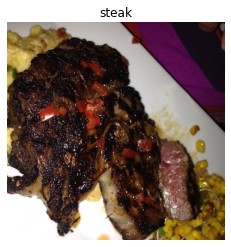

In [11]:
img = view_random_image(target_dir = "pizza_steak/train/", target_class="steak")

In [12]:
type(img)

numpy.ndarray

### 저 shape의 결과를 보면 (너비, 높이, 색상 채널)의 형식으로 되어 있는 것을 알 수 있다!
### 너비와 이미지 마다 서로 다를 수는 있지만, 색상 이미지에서는 채널값은 항상 3이다.
### 왜? -> 채널은 일반적으로 RGB이기 때문! 

### 또한, img 배열의 모든 값이 0 ~ 255 사이에 존재,
### RGB가 가능한 값의 범위가 0 ~ 255사이 때문 

### 피자와 스테이크의 이미지는 구분하는 모델을 만들 때, 각 클래스의 모양을 결정하는 다양한 픽셀 값에서 
### 패턴을 찾는것이 이미지 분류의 핵심!!

### 신경망을 포함한 많은 기계 학습 모델은 0 ~ 1사이의 값을 사용하는 것을 선호
### computer vision에서 이미지를 전처리할 때 가장 많이 하는 방식이 scaling을 합니다.
### 255로 나누는 방법을 사용하며, normalize라는 표현을 사용한다.

In [13]:
img / 255

array([[[0.60392157, 0.56078431, 0.5372549 ],
        [0.60392157, 0.56078431, 0.5372549 ],
        [0.6       , 0.55686275, 0.53333333],
        ...,
        [0.03921569, 0.02352941, 0.01960784],
        [0.04313725, 0.02745098, 0.02352941],
        [0.05490196, 0.03921569, 0.03529412]],

       [[0.60784314, 0.56470588, 0.54117647],
        [0.60784314, 0.56470588, 0.54117647],
        [0.60392157, 0.56078431, 0.5372549 ],
        ...,
        [0.04705882, 0.03137255, 0.02745098],
        [0.03529412, 0.01960784, 0.01568627],
        [0.03921569, 0.02352941, 0.01960784]],

       [[0.61176471, 0.56862745, 0.54509804],
        [0.61176471, 0.56862745, 0.54509804],
        [0.60784314, 0.56470588, 0.54117647],
        ...,
        [0.13333333, 0.11372549, 0.10196078],
        [0.08235294, 0.0627451 , 0.05098039],
        [0.04705882, 0.02745098, 0.01568627]],

       ...,

       [[0.99215686, 0.99215686, 0.99215686],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0

## CNN 구조
### CNN은 **다양한 방식**으로 만들어 질 수 있다!

## CNN의 일반적인 구성요소 (comnent)
| 하이퍼 파리미터 / 레이어 종류 | 하는 일 | 일반 적인 값 |
|------|------|-----|
| 입력 이미지 | 패턴을 발견하고 싶은 대상 이미지 | 이미지 |  
| 입력 층  | 대상 이미지를 가져와서 다음 계층에 전달하기 위해 사전 처리 | input_shape = 
| Convolution 층 (합성층)  |  
| 은닉층 (Hidden)  |   
| 풀링층 (Pooling) |
| Fully connected layer (완전결함층) |
| 출력층 |
| 출력 활성함수 | 

In [14]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib as plt
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

train_data = train_datagen.flow_from_directory(
    train_dir,                 # 학습 이미지가 있는 디렉토리를 지정하고
    batch_size = 30,           # 1번에 처리할 이미지의 갯수
    target_size = (224, 224),  # 처리할 이미지의 크기를 224 X 224로 조정
    class_mode = 'binary',
    seed = 42
)

valid_data = valid_datagen.flow_from_directory(
    test_dir,                 # 학습 이미지가 있는 디렉토리를 지정하고
    batch_size = 30,           # 1번에 처리할 이미지의 갯수
    target_size = (224, 224),  # 처리할 이미지의 크기를 224 X 224로 조정
    class_mode = 'binary',
    seed = 42
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [23]:
# CNN 모델을 생성
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D( ## 컨볼루션 연산을 계속 하는것 
        filters = 10,
        kernel_size = 3, # (3, 3) 
        activation = "relu",
        input_shape = (224, 224, 3)
    ),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D( ## pool_size가 지나가면서 높은 값을 찾음
        pool_size = 2,   # (2, 2)
        padding = "valid"
    ),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [25]:
# 모델 컴파일 

model_1.compile(
    loss = "binary_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [26]:
# 모델에게 데이터 학습 -> 피팅
# history에 학습 결과를 저장
history_1 = model_1.fit(
    train_data,
    epochs = 5,
    steps_per_epoch = len(train_data),
    validation_data = valid_data,
    validation_steps = len(valid_data)
)

Epoch 1/5
50/50 [==============================] - 102s 2s/step - loss: 0.5881 - accuracy: 0.6800 - val_loss: 0.4323 - val_accuracy: 0.7720
Epoch 2/5
50/50 [==============================] - 109s 2s/step - loss: 0.4214 - accuracy: 0.8167 - val_loss: 0.3506 - val_accuracy: 0.8660
Epoch 3/5
50/50 [==============================] - 96s 2s/step - loss: 0.3837 - accuracy: 0.8333 - val_loss: 0.3188 - val_accuracy: 0.8680
Epoch 4/5
50/50 [==============================] - 105s 2s/step - loss: 0.3589 - accuracy: 0.8433 - val_loss: 0.3336 - val_accuracy: 0.8620
Epoch 5/5
50/50 [==============================] - 86s 2s/step - loss: 0.3440 - accuracy: 0.8533 - val_loss: 0.3021 - val_accuracy: 0.8820


In [27]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [29]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224,224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [30]:
model_2.compile(
    loss = "binary_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [31]:
history_2 = model_2.fit(
    train_data,
    epochs=5,
    steps_per_epoch =len(train_data),
    validation_data = valid_data,
    validation_steps = len(valid_data)
)

Epoch 1/5
50/50 [==============================] - 9s 174ms/step - loss: 0.7065 - accuracy: 0.4747 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
50/50 [==============================] - 8s 170ms/step - loss: 0.6927 - accuracy: 0.4767 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
50/50 [==============================] - 8s 157ms/step - loss: 0.6927 - accuracy: 0.4913 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
50/50 [==============================] - 8s 152ms/step - loss: 0.6927 - accuracy: 0.5007 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
50/50 [==============================] - 8s 151ms/step - loss: 0.6927 - accuracy: 0.5007 - val_loss: 0.6931 - val_accuracy: 0.5000


In [33]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [34]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [35]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([  
    tf.keras.layers.Flatten(input_shape = (224,224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),  ## 뉴런의 개수를 100개로 만듬
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_3.compile(
    loss = "binary_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

history_3 = model_3.fit(
    train_data,
    epochs=5,
    steps_per_epoch =len(train_data),
    validation_data = valid_data,
    validation_steps = len(valid_data)
)

Epoch 1/5
50/50 [==============================] - 13s 246ms/step - loss: 2.9590 - accuracy: 0.6207 - val_loss: 0.9628 - val_accuracy: 0.7300
Epoch 2/5
50/50 [==============================] - 14s 284ms/step - loss: 0.6489 - accuracy: 0.7307 - val_loss: 0.4490 - val_accuracy: 0.8040
Epoch 3/5
50/50 [==============================] - 15s 295ms/step - loss: 0.5899 - accuracy: 0.7373 - val_loss: 0.4887 - val_accuracy: 0.8000
Epoch 4/5
50/50 [==============================] - 14s 288ms/step - loss: 0.6390 - accuracy: 0.7347 - val_loss: 0.4470 - val_accuracy: 0.7980
Epoch 5/5
50/50 [==============================] - 13s 264ms/step - loss: 0.5385 - accuracy: 0.7567 - val_loss: 0.6063 - val_accuracy: 0.7160


In [36]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________
